<a href="https://colab.research.google.com/github/saurabhIU/Deep-Learning/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time
import os
warnings.filterwarnings('ignore')

In [119]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/MNIST_data", one_hot=True)

Extracting /tmp/data/MNIST_data/train-images-idx3-ubyte.gz
Extracting /tmp/data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [120]:
X_train, Y_train = mnist.train.images,mnist.train.labels
X_test, Y_test = mnist.test.images, mnist.test.labels
print (f'Total Training Images in Dataset {X_train.shape} , Total training label is {Y_train.shape}')
print (f'Total Test Images in Dataset {X_test.shape} , Total test label is {Y_test.shape}')

Total Training Images in Dataset (55000, 784) , Total training label is (55000, 10)
Total Test Images in Dataset (10000, 784) , Total test label is (10000, 10)


In [0]:
EPOCHS = 400

In [0]:
X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])
layer_output = tf.placeholder("float", [None, 1024])
BATCH_SIZE = 10000

# Neural Network

In [0]:
def nn_model(data):
  
    layer1 = tf.layers.dense(data, 1024,activation=tf.nn.relu)
    layer2 = tf.layers.dense(layer1, 1024,activation=tf.nn.relu)
    layer3 = tf.layers.dense(layer2, 1024,activation=tf.nn.relu)
    layer4 = tf.layers.dense(layer3, 1024,activation=tf.nn.relu)
    logits = tf.layers.dense(layer4, 10)
    
    return logits,layer1,layer2,layer3,layer4


# Helper Function to get batches for training and test

In [0]:
def get_input_batch(batch_size, data, labels):
    '''
    Return a total of `batch_size` random samples and labels. 
    '''
    index = np.random.choice(data.shape[0], batch_size)
    x = [data[i] for i in (index)]
    y = [labels[i] for i in (index)]
    return np.asarray(x), np.asarray(y)

# Functions to calculate Cost, Optimizer,Prediction

In [0]:
logits,layer1_output,layer2_output,layer3_output,layer4_output = nn_model(X)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y,logits=logits)
optimizer = tf.train.AdamOptimizer().minimize(cost)
prediction = tf.nn.softmax(logits)
prediction_of_last_layer = tf.nn.softmax(layer4_output)
correct_prediction = tf.equal(tf.argmax(prediction, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



In [126]:
sess =  tf.Session() 
    
sess.run(tf.global_variables_initializer())
  
tic = time.time()
for i in range(EPOCHS):
    x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)
    c,_,acc = sess.run([cost, optimizer, accuracy],feed_dict={X: x_batch, Y: y_batch})
    if i % 100 == 0:
      print(f'Epoch: {i},training accuracy:{acc * 100}')
toc = time.time()
print(f'Time taken for training is {toc-tic}')
print(f'Test Accuracy is {sess.run(accuracy*100,feed_dict={X: X_test, Y: Y_test})}')

Epoch: 0,training accuracy:10.300000011920929
Epoch: 100,training accuracy:99.5199978351593
Epoch: 200,training accuracy:100.0
Epoch: 300,training accuracy:100.0
Time taken for training is 54.82791566848755
Test Accuracy is 98.1500015258789


**Helper function to plot image**

In [0]:
def plot_img(data,prob_list):
  counter = { 0: 0, 1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0} 
  max_num_of_plot = 10
  fig, axes = plt.subplots(10, 10,figsize=(15,15))
  for index,prob in enumerate(prob_list):
    if (counter[prob] < max_num_of_plot):
      img = data[index].reshape(28,28)
      axes[prob,counter[prob]].imshow(img, cmap='viridis')
      counter[prob] +=1
  plt.show()

def single_image(data):
  img = data.reshape(28,28)
  plt.imshow(img,interpolation='nearest', cmap='seismic')

# Problem 3 Steps:

**1) Capture output **

**2) For each 10-d output vector, find the dim with the maximum probability**

**3) Plot the input image associated with that in a grid of subplots**

In [128]:
BATCH_SIZE = 1000
x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)
print(x_batch.shape)
output = sess.run(prediction,feed_dict={X: x_batch, Y: y_batch})

(1000, 784)


**Calculate maximum Probability for each sample**

In [0]:
max_prob = [np.argmax(output[i]) for i in range(output.shape[0])]

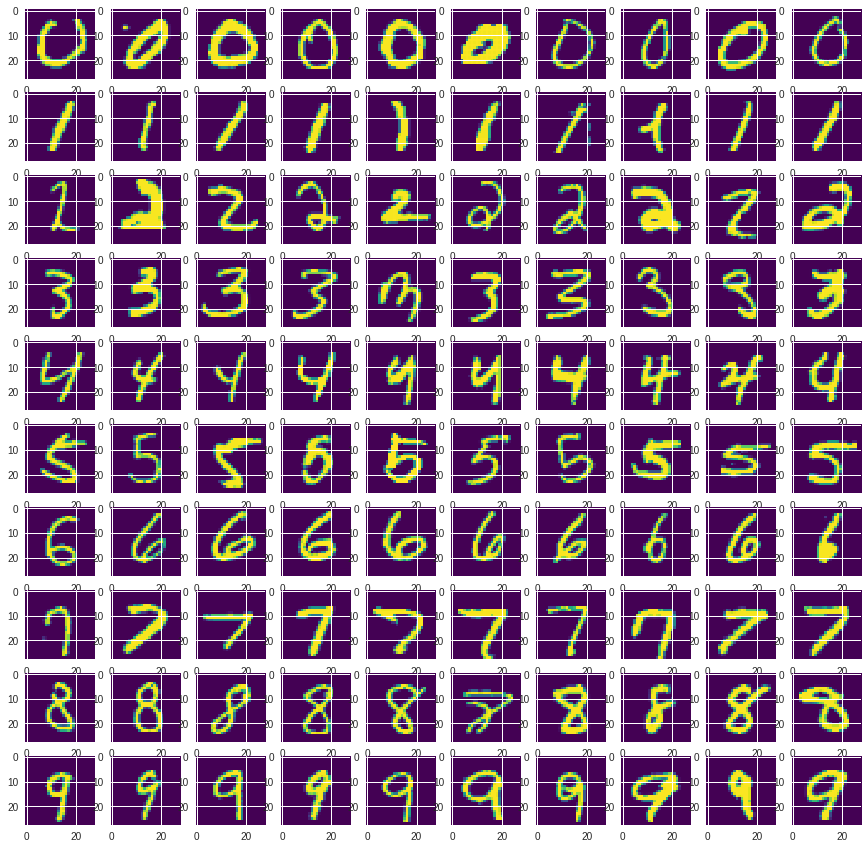

In [130]:
plot_img(x_batch,max_prob)

# Problem 4 Steps:

**1) Capture output of Last Layer**

**2) Choose 10 random dimensions out of 1024 dimensions**

**3) For each 10-d output vector, find the dim with the maximum probability**

**4) Plot the input image associated with that in a grid of subplots**
  

In [145]:
BATCH_SIZE = 1000
x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)
print(x_batch.shape)
last_layer_pediction = sess.run(prediction_of_last_layer,feed_dict={X: x_batch})

(1000, 784)


In [0]:
'''Choose 10 random dimensions from 1024 dimensions'''
rand_dim = np.random.choice(1024, 10)
'''Define an array of size 1000X10'''
last_layer_output = np.zeros((last_layer_pediction.shape[0],10))

for j in range(last_layer_pediction.shape[0]):
  row_vector = [last_layer_pediction[j][i] for i in (rand_dim)]
  last_layer_output[j] = np.asarray(row_vector)
'''Calcuklate maximum probability'''
max_prob_last_layer = [np.argmax(last_layer_output[i]) for i in range(last_layer_output.shape[0])]
  

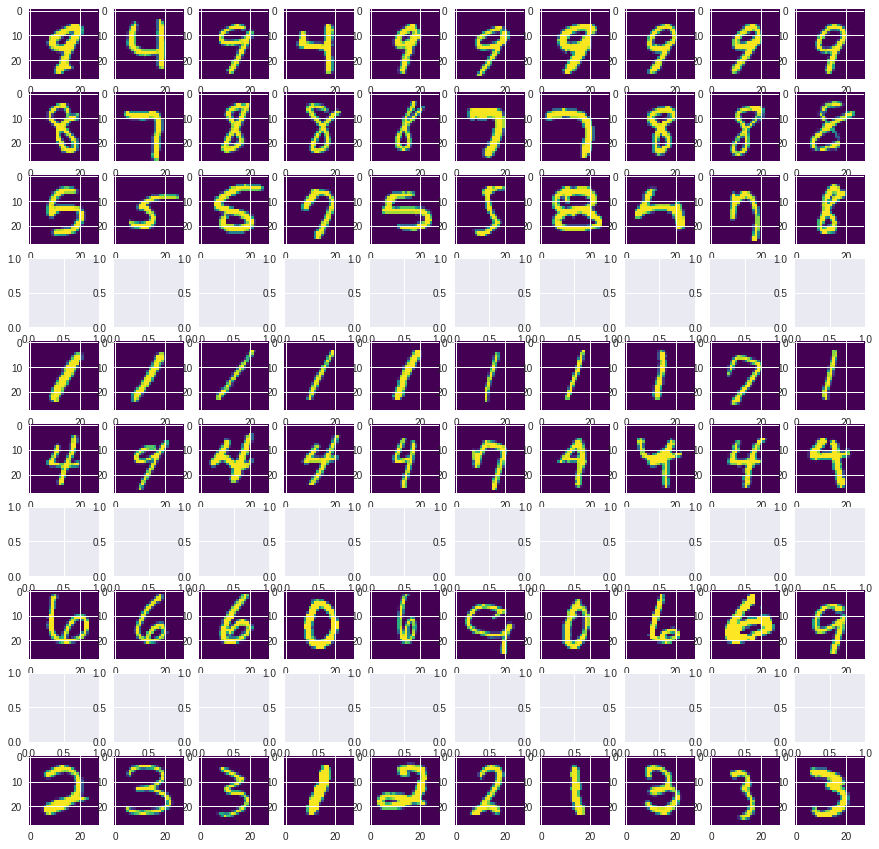

In [147]:
plot_img(x_batch,max_prob_last_layer)